feat: add customer segmentation function to src/utils.py

fix: handle NaN values in order value column

docs: update README with project instructions

refactor: simplify price clustering logic

style: reformat notebook using black formatter

test: add test for review score categorization

chore: add .gitignore and setup requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots

In [75]:
df_college = pd.read_csv(r'C:\Users\tranv\Desktop\Data science\files\College.csv')
df_auto = pd.read_csv(r'C:\Users\tranv\Desktop\Data science\files\auto.csv')
df_bonston = pd.read_csv(r'C:\Users\tranv\Desktop\Data science\files\Boston.csv')
df_advertising = pd.read_csv(r'C:\Users\tranv\Desktop\Data science\files\advertising.csv')
df_carseats = pd.read_csv(r'C:\Users\tranv\Desktop\Data science\files\carseats.csv')

## 2.4. Excercise


#Conceptual
1. For each of parts (a) through (d), indicate whether we would generally
 expect the performance of a flexible statistical learning method to be
 better or worse than an inflexible method. Justify your answer.

 (a) The sample size n is extremely large, and the number of predic
tors p is small.

 (b) The number of predictors p is extremely large, and the number
 of observations n is small.

 (c) The relationship between the predictors and response is highly
 non-linear.
 
 (d) The variance of the error terms, i.e. 2 = Var( ), is extremely
 high.

First we need to understand what is flexible and inflexible statistical learnign method?

+) Flexible method (non-parametric): refets to any modeling approach that allows for capturing complex relationships between input variables (predictors) and output variables (reponses), without assuming a strict or simple functional form (like linearity)

+) Inflexible method (parametric): is the one that makes strong assumptions about the functional form of the relationship between predictors and the responses. when to use: When interpretability is important
When you have small datasets
When the true relationship is likely simple


a) flexible: with large n, we have enough data to accurately estimate complex models without overfitting. Since p is small, the curse of dimensionality is not an issue. 

b) inflexible: with high p and low n, flexible methods tend to overfit. Inflexible methods impose stronger structure and regularization, making them less likely to overfit. 

c) Flexible

d) inflexible: when error variance is high, model predictions are inherently noisy. Flexible methods may try to fit the noise, increasing variance and worsening performance. Inflexible methods smooth over the noise. 


3. We now revisit the bias-variance decomposition.

 (a) Provide a sketch of typical (squared) bias, variance, training er
ror, test error, and Bayes (or irreducible) error curves, on a sin
gle plot, as we go from less flexible statistical learning methods
 towards more flexible approaches. The x-axis should represent
 the amount of flexibility in the method, and the y-axis should
 represent the values for each curve. There should be five curves.
 Make sure to label each one.
 
 (b) Explain why each of the five curves has the shape displayed in
 part (a).

Curve	What It Measures	Behavior w/ Flexibility

Squared Bias	Wrong assumptions (underfitting)	🔻 Decreases

Variance	Sensitivity to training data	🔺 Increases

Training Error	Error on training data	🔻 Decreases to near 0

Test Error	Generalization ability	🔻 then 🔺 → U-shaped

Bayes Error	Noise in data (can't remove)	➖ Flat (constant)

4. You will now think of some real-life applications for statistical learn
ing.

 (a) Describe three real-life applications in which classification might
 be useful. Describe the response, as well as the predictors. Is the
 goal of each application inference or prediction? Explain your
 answer.

 (b) Describe three real-life applications in which regression might
 be useful. Describe the response, as well as the predictors. Is the
 goal of each application inference or prediction? Explain your
 answer.
 
 (c) Describe three real-life applications in which cluster analysis
 might be useful.

Feature	Supervised Learning	Unsupervised Learning

Data	Labeled (with output)	Unlabeled (no output)

Goal	Predict outcome	Find structure/patterns

Examples	Regression, Classification	Clustering, PCA

Use Case	Spam detection, sales forecast	Customer segmentation, anomaly detection

5. What are the advantages and disadvantages of a very flexible (versus
 a less flexible) approach for regression or classification? Under what
 circumstances might a more flexible approach be preferred to a less
 flexible approach? When might a less flexible approach be preferred?

1. Flexible Approach (e.g., splines, decision trees, neural networks)
Advantages:

Lower bias: Flexible models can closely follow the training data and capture complex relationships.

Better prediction (in some cases): When the true relationship is highly nonlinear or complicated, flexible models often outperform simpler ones.

Disadvantages:

Higher variance: Flexible models may overfit the training data, meaning they perform poorly on new (test) data.

Less interpretability: Flexible models are often black-boxes — it’s harder to explain how predictions are made.

Data-hungry: They often require large datasets to perform well without overfitting.

2. Less Flexible Approach (e.g., linear regression, logistic regression)
Advantages:

Lower variance: Simpler models are less likely to overfit, especially with limited data.

More interpretable: Easier to understand and explain the model behavior and variable importance.

Requires less data: Performs reasonably well even with small datasets.

Disadvantages:

Higher bias: Might underfit if the true relationship is nonlinear or complex.

Worse prediction in complex problems: May miss patterns that a flexible model could capture.

In [3]:
df_college.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [4]:
df_college = df_college.rename({'Unnamed: 0':'College'},axis=1)

In [5]:
df_college = df_college.set_index('College')

In [6]:
df_college.head(2)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [7]:
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


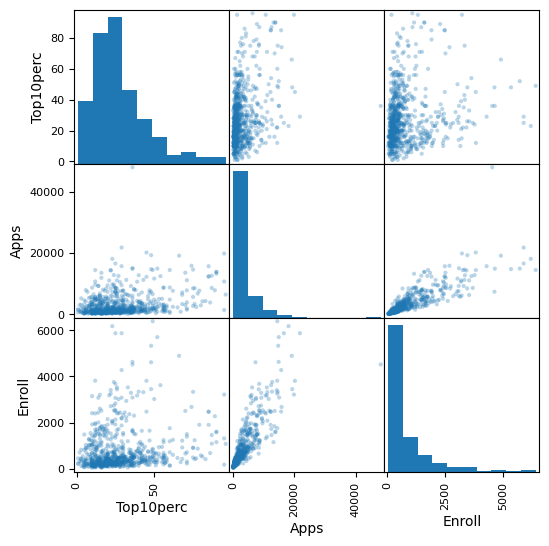

In [8]:
pd.plotting.scatter_matrix(df_college[['Top10perc', 'Apps', 'Enroll']], figsize=(6, 6), alpha=0.3)
plt.show()


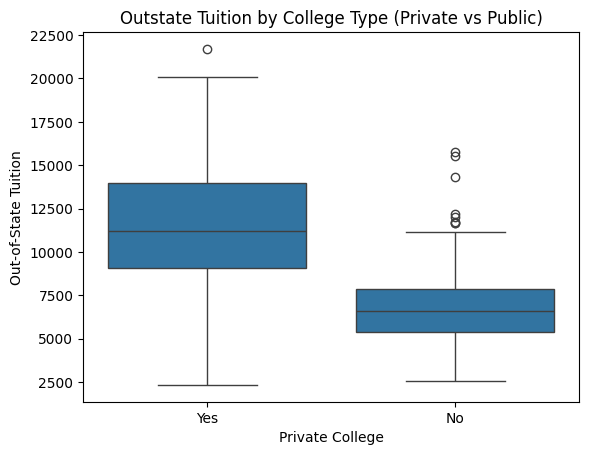

In [9]:
sns.boxplot(x='Private', y='Outstate', data=df_college)
plt.title('Outstate Tuition by College Type (Private vs Public)')
plt.xlabel('Private College')
plt.ylabel('Out-of-State Tuition')
plt.show()

C:\Users\tranv\AppData\Local\Temp\ipykernel_19048\1597811379.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Private College')


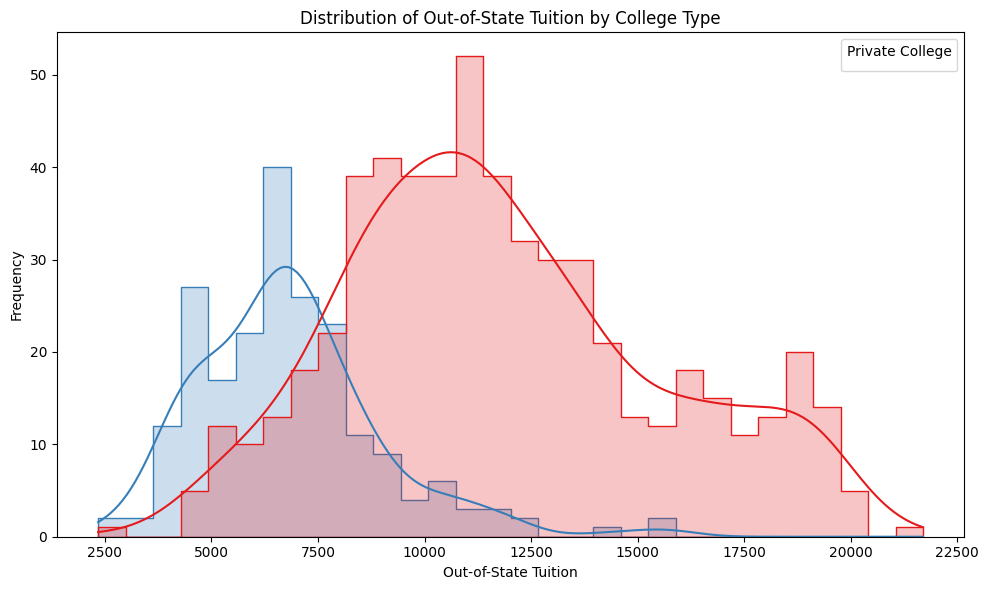

In [10]:

plt.figure(figsize=(10, 6))

# Draw histogram + KDE
sns.histplot(
    data=df_college,
    x='Outstate',
    hue='Private',         # Separate by Private vs Public
    kde=True,              # Add kernel density estimate
    bins=30,               # Number of histogram bins
    palette='Set1',        # Color palette
    element='step'         # Step-style histogram
)

plt.title('Distribution of Out-of-State Tuition by College Type')
plt.xlabel('Out-of-State Tuition')
plt.ylabel('Frequency')
plt.legend(title='Private College')
plt.tight_layout()
plt.show()


In [11]:
# create a elite column
df_college['Elite'] = df_college['Top10perc'].apply(lambda x: 'Yes' if x > 50 else 'No')

In [12]:
df_college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

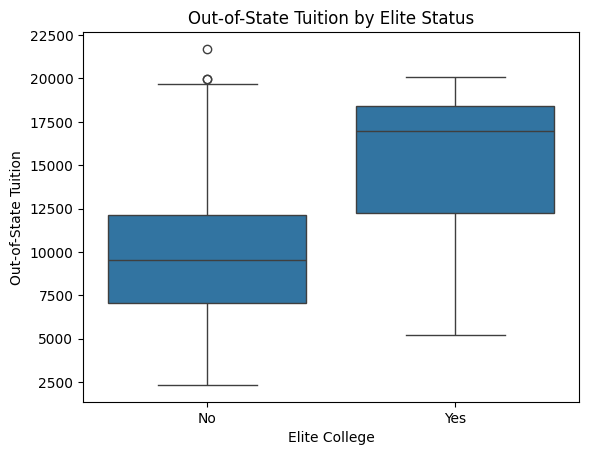

In [13]:
sns.boxplot(x='Elite', y='Outstate', data=df_college)
plt.title('Out-of-State Tuition by Elite Status')
plt.xlabel('Elite College')
plt.ylabel('Out-of-State Tuition')
plt.show()

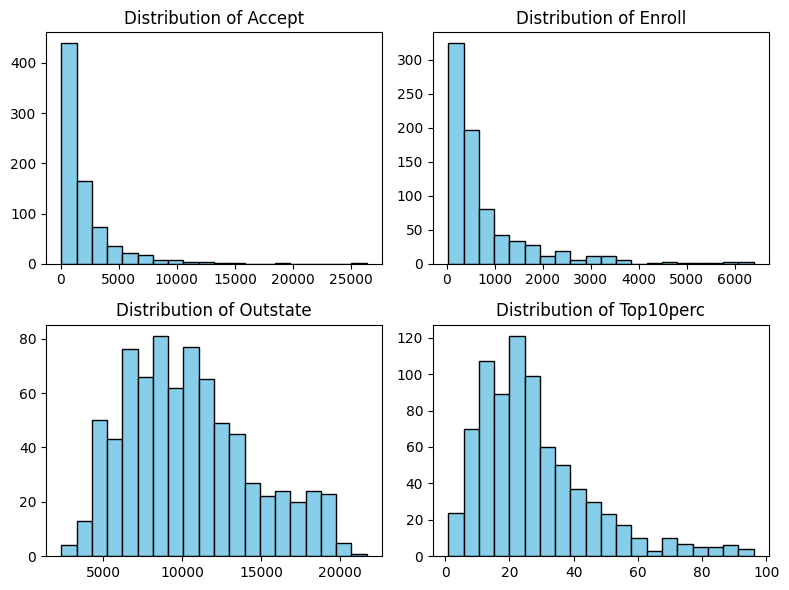

In [14]:
fig = plt.figure(figsize=(8,6))
variables = ['Accept','Enroll','Outstate','Top10perc']

for i in range(4):
    ax= fig.add_subplot(2,2,i+1)
    ax.hist(df_college[variables[i]],bins=20,color='skyblue',edgecolor='black')
    ax.set_title(f'Distribution of {variables[i]}')
plt.tight_layout()
plt.show()

In [15]:
# exercise 9
df_auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


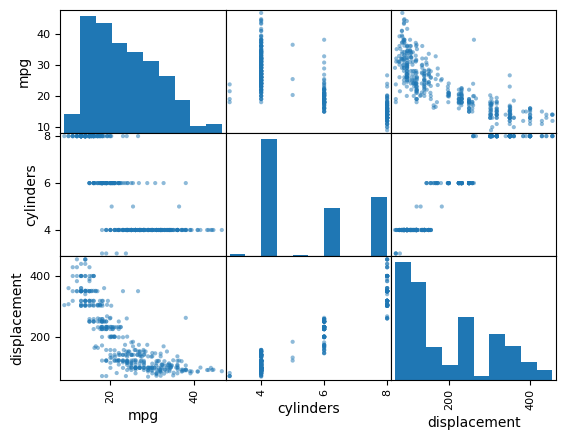

In [16]:
pd.plotting.scatter_matrix(df_auto[['mpg','cylinders','displacement','horsepower']])
plt.show()

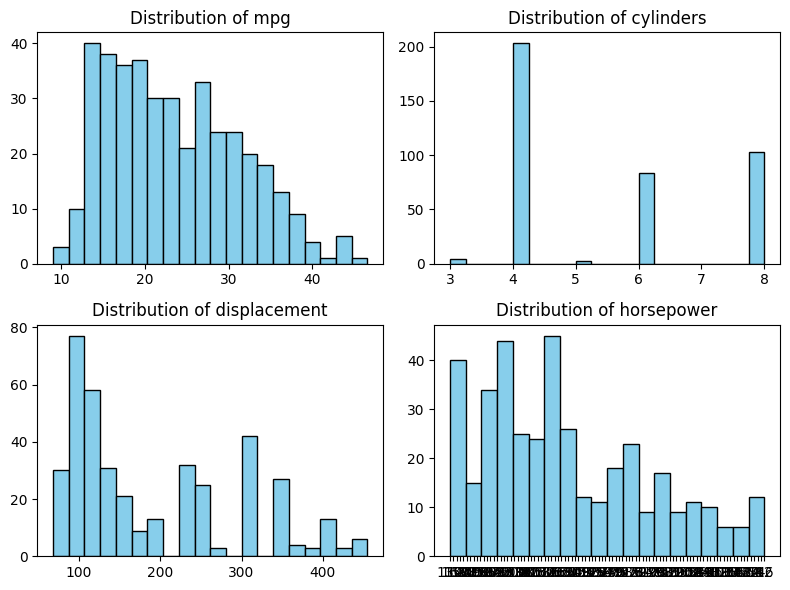

In [17]:
fig = plt.figure(figsize=(8,6))

variables = ['mpg','cylinders','displacement','horsepower']

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(df_auto[variables[i]], bins=20, color= 'skyblue', edgecolor = 'black')
    ax.set_title(f'Distribution of {variables[i]}')
    
plt.tight_layout()   
plt.show()

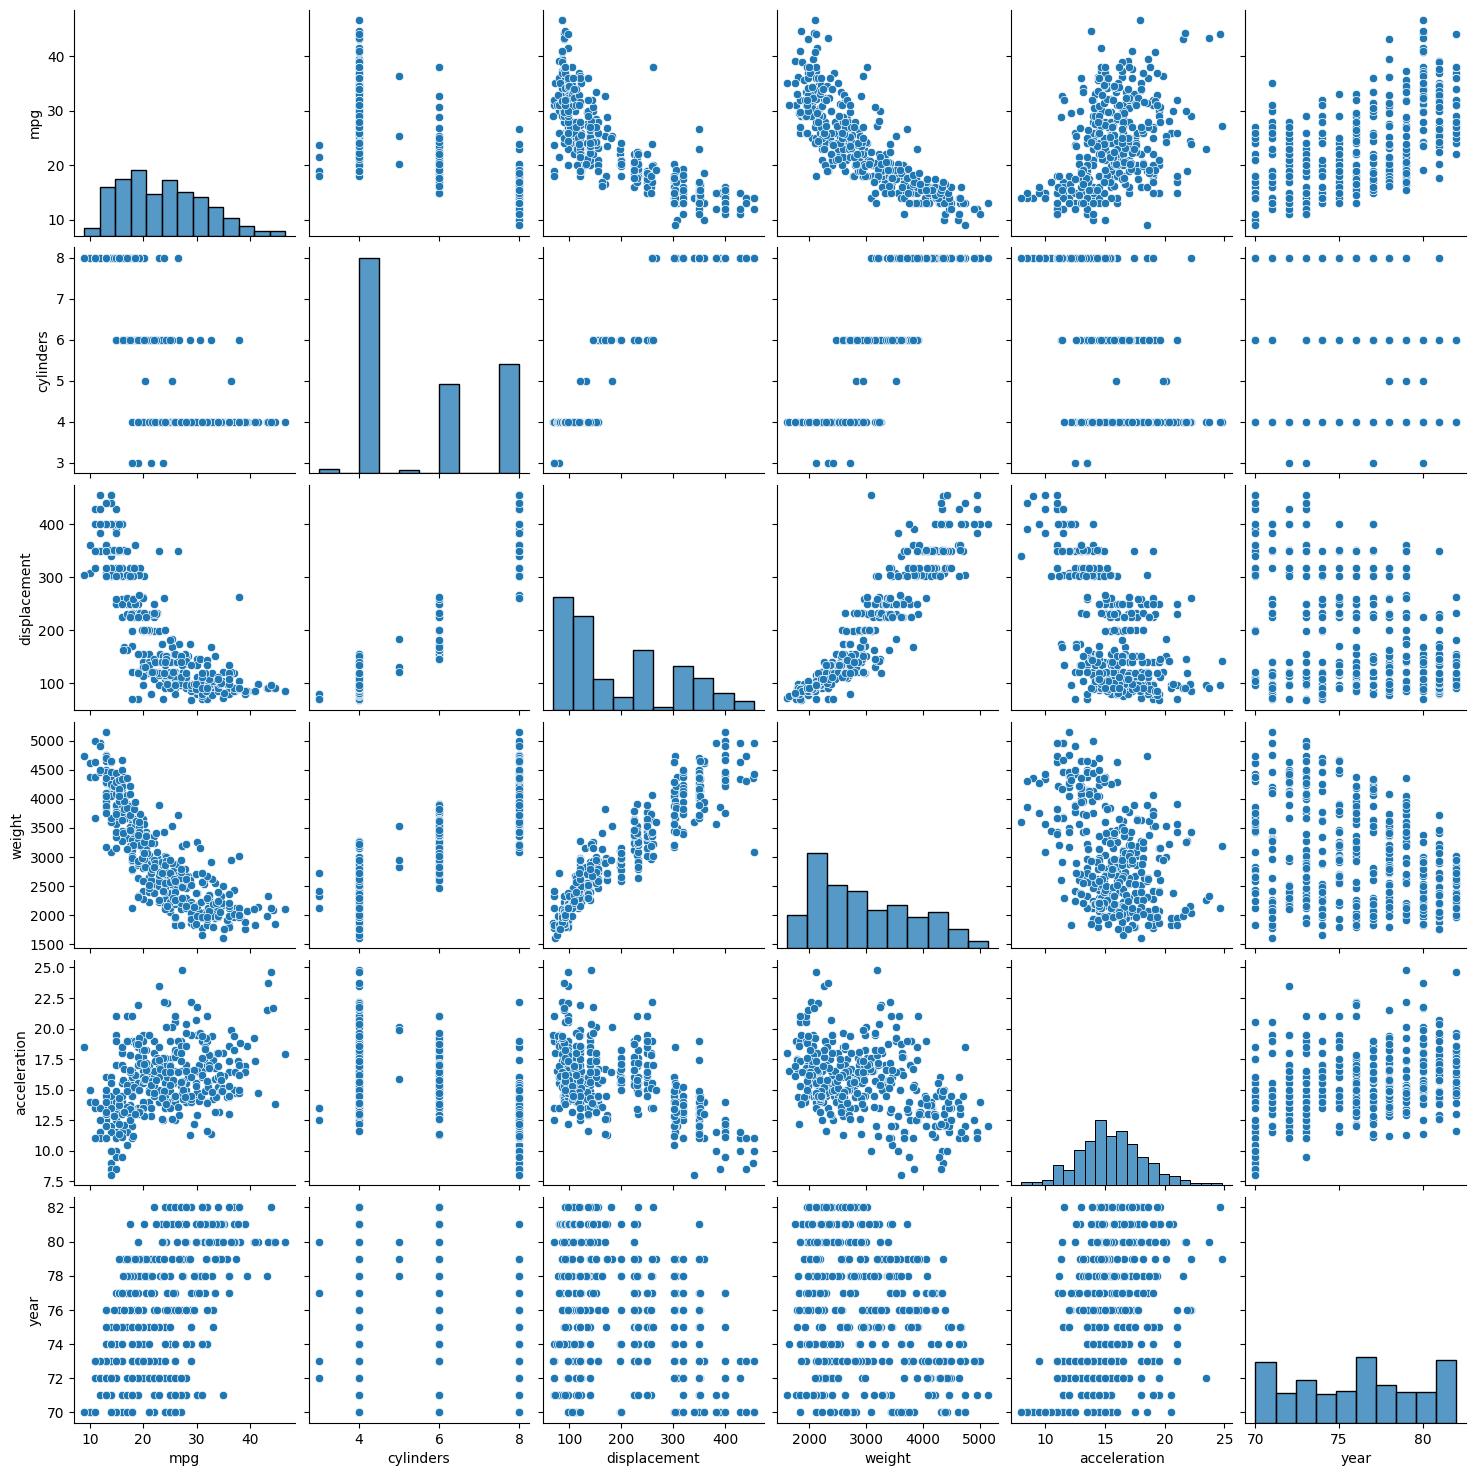

In [18]:
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
sns.pairplot(df_auto[numeric_cols])
plt.show()


In [19]:
for col in df_auto.columns:
    if df_auto[col].astype(str).str.contains(r'^\s*\?\s*$', regex=True).any():
        print(f"Column '{col}' contains '?'")


Column 'horsepower' contains '?'


In [20]:
df_auto['horsepower'].unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [21]:
# drop ? value
# option 1
df_auto = df_auto[~df_auto.apply(lambda row: row.astype(str).str.strip().eq('?').any(), axis=1)]
# option 2
"""
# Replace '?' with NaN in the whole DataFrame
df_auto.replace('?', np.nan, inplace=True)

# Now convert relevant columns to numeric (if needed)
df_auto['horsepower'] = pd.to_numeric(df_auto['horsepower'], errors='coerce')

# Option 1: Drop rows with missing values
df_auto.dropna(inplace=True)

# Option 2: Fill missing values (optional)
# df_auto['horsepower'].fillna(df_auto['horsepower'].median(), inplace=True) """



"\n# Replace '?' with NaN in the whole DataFrame\ndf_auto.replace('?', np.nan, inplace=True)\n\n# Now convert relevant columns to numeric (if needed)\ndf_auto['horsepower'] = pd.to_numeric(df_auto['horsepower'], errors='coerce')\n\n# Option 1: Drop rows with missing values\ndf_auto.dropna(inplace=True)\n\n# Option 2: Fill missing values (optional)\n# df_auto['horsepower'].fillna(df_auto['horsepower'].median(), inplace=True) "

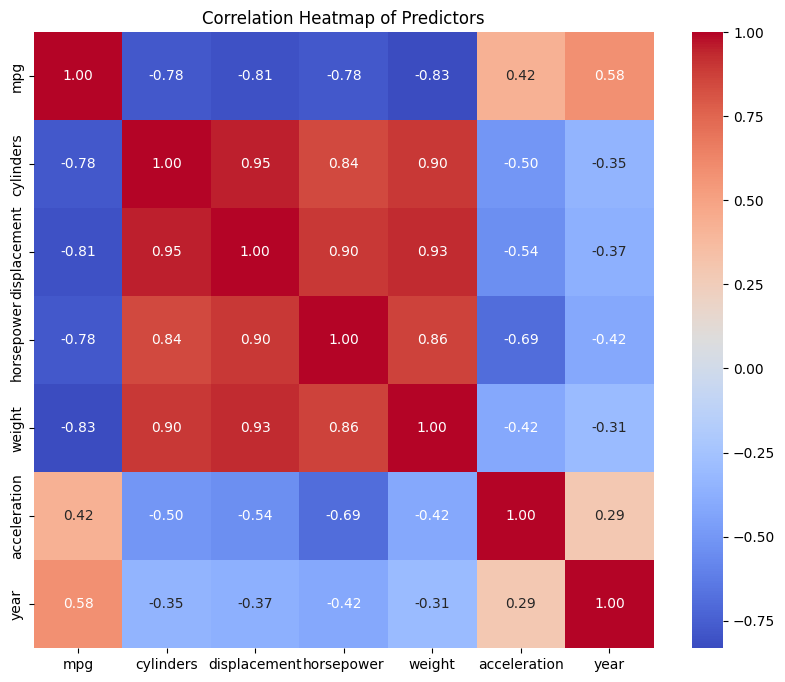

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_auto[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Predictors")
plt.show()


#exercise 10

In [23]:
df_bonston.head(2)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


In [24]:
df_bonston.shape

(506, 14)

In [25]:
df_bonston = df_bonston.rename({'Unnamed: 0':'Order'},axis=1)
df_bonston = df_bonston.set_index('Order')

In [26]:
df_bonston.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Order,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


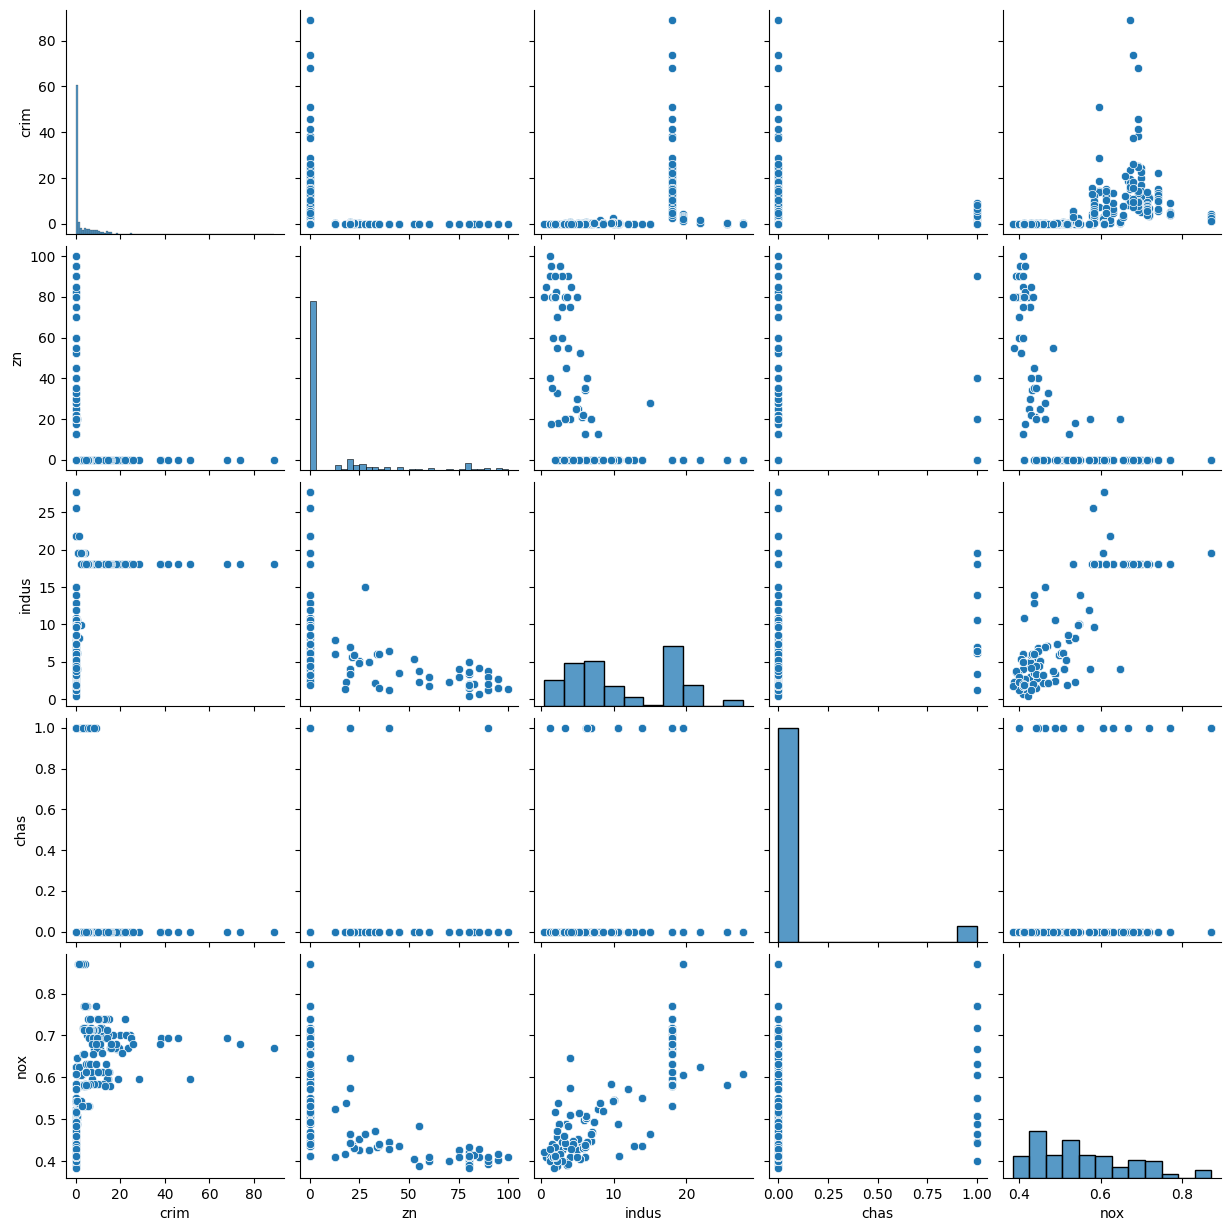

In [27]:
variables = ['crim','zn','indus','chas','nox']
sns.pairplot(df_bonston[variables])
plt.show()

In [28]:
df_bonston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [29]:
number_bound = df_bonston['chas'].sum()
print(f"Number of suburbs bound to the river is : {number_bound}")

Number of suburbs bound to the river is : 35


In [30]:
ptratio_me = df_bonston['ptratio'].median()
print(f"The median of ptratio is : {ptratio_me}")

The median of ptratio is : 19.05


In [31]:
min_medv_suburb = df_bonston[df_bonston['medv']==df_bonston['medv'].min()]

In [32]:
min_medv_suburb

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Order,,,,,,,,,,,,,
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [33]:
# Get overall min and max (range) for each predictor
ranges = df_bonston.describe().loc[['min', 'max']]
print("\nOverall predictor ranges:\n")
print(ranges)



Overall predictor ranges:

         crim     zn  indus  chas    nox     rm    age      dis   rad    tax  \
min   0.00632    0.0   0.46   0.0  0.385  3.561    2.9   1.1296   1.0  187.0   
max  88.97620  100.0  27.74   1.0  0.871  8.780  100.0  12.1265  24.0  711.0   

     ptratio  lstat  medv  
min     12.6   1.73   5.0  
max     22.0  37.97  50.0  


# 3. Linear regression

In [34]:
df_advertising.head(2)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [35]:
df_advertising = df_advertising.rename({'Unnamed: 0':'Order'},axis=1)
df_advertising = df_advertising.set_index('Order')

In [36]:
df_advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


The analogy between linear regression and estimation of the mean of a
 random variable is an apt one based on the concept of bias. If we use the bias
 sample mean ˆ µ to estimate µ, this estimate is unbiased, in the sense that unbiased
 on average, we expect ˆ µ to equal µ. What exactly does this mean? It means
 that on the basis of one particular set of observations y1,...,yn, ˆ µ might
 overestimate µ, and on the basis of another set of observations, ˆ µ might
 underestimate µ. But if we could average a huge number of estimates of
 µ obtained from a huge number of sets of observations, then this average
 would exactly equal µ. Hence, an unbiased estimator does not systematically
 over- or under-estimate the true parameter.

We have established that the
 average of ˆ µ’s over many data sets will be very close to µ, but that a
 single estimate ˆ µ may be a substantial underestimate or overestimate of µ.
 How far off will that single estimate of ˆ µ be? In general, we answer this
 question by computing the standard error of ˆ µ, written as SE(ˆ µ). We have standard
 the well-known formula
 where 

Var(ˆ µ) = SE(ˆ µ)2 = 2
 n
 ,
 
 
 is the standard deviation of each of the realizations yi of Y .2
 Roughly speaking, the standard error tells us the average amount that this
 estimate ˆ µ differs from the actual value of µ. 

3.1.3. Assessing the accuracy of the model (RSE, R^2, F-statistic)
- RSE: The RSE is an estimate of the standard
 deviation of . Roughly speaking, it is the average amount that the response. The RSE provides an absolute measure of lack of fit of the model
 will deviate from the true regression line.
- R2: The R2 statistic provides an alternative
 measure of fit. It takes the form of a proportion—the proportion of variance
 explained—and so it always takes on a value between 0 and 1, and is
 independent of the scale of Y .    
 In single linear regression,  The R2 statistic is actually a measure of the linear relationship between X and
 Y. Recall that correlation, defined as. so R2= Cov(X,Y)
 But in multiple linear regression , we will see the value of R2

Multiple linear regression

 However, the approach of fitting a separate simple linear regression model
 for each predictor is not entirely satisfactory. First of all, it is unclear how to
 make a single prediction of sales given the three advertising media budgets,
 since each of the budgets is associated with a separate regression equation.
 Second, each of the three regression equations ignores the other two media
 in forming estimates for the regression coefficients. We will see shortly that
 if the media budgets are correlated with each other in the 200 markets
 in our data set, then this can lead to very misleading estimates of the
 association between each media budget and sales.

# Practice

In [37]:
import statsmodels.api as sm

In [38]:
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [39]:
A = np.array([3,5,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [40]:
df_bonston.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Order,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


In [41]:
df_bonston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [42]:
df_bonston.shape[0]

506

In [43]:
np.ones(df_bonston.shape[0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [44]:
X = pd.DataFrame({'intercept': np.ones(df_bonston.shape[0]),
                  'lstat': df_bonston['lstat']})
X[:4]

,intercept,lstat
Order,,
1,1.0,4.98
2,1.0,9.14
3,1.0,4.03
4,1.0,2.94


In [45]:
y = df_bonston['medv']
model = sm.OLS(y,X)
results = model.fit()

In [46]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 10 Aug 2025   Prob (F-statistic):           5.08e-88
Time:                        09:33:38   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.0

In [47]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [48]:
results.conf_int()

,0,1
intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


In [49]:
predictions = results.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)

In [50]:
plot_data = pd.DataFrame({
    'lstat': X['lstat'],
    'medv': y,
    'predicted': pred_summary['mean'],
    'ci_lower': pred_summary['mean_ci_lower'],
    'ci_upper': pred_summary['mean_ci_upper']
})

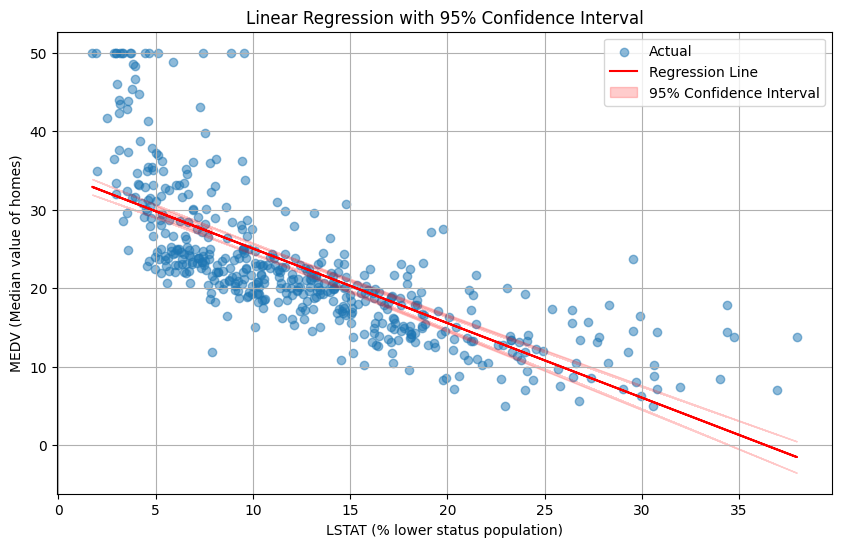

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['lstat'], plot_data['medv'], label='Actual', alpha=0.5)
plt.plot(plot_data['lstat'], plot_data['predicted'], color='red', label='Regression Line')
plt.fill_between(plot_data['lstat'], plot_data['ci_lower'], plot_data['ci_upper'], 
                 color='red', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('LSTAT (% lower status population)')
plt.ylabel('MEDV (Median value of homes)')
plt.title('Linear Regression with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

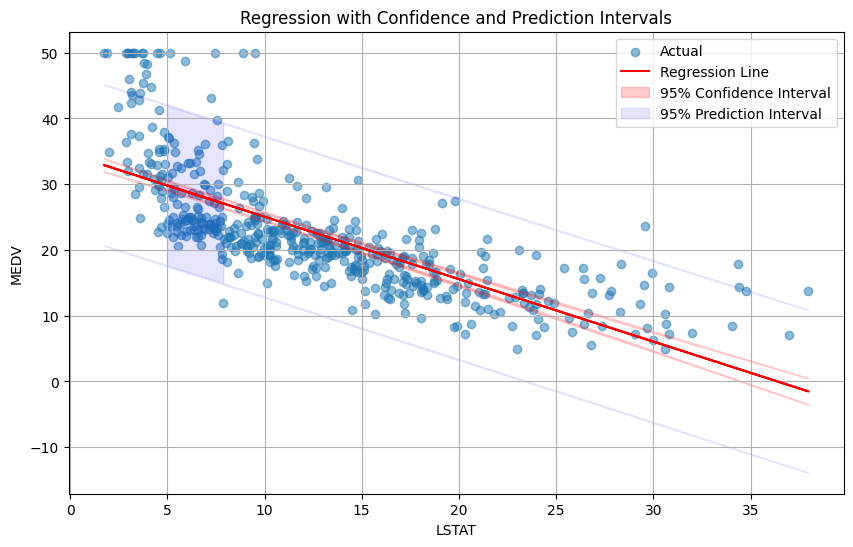

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(X['lstat'], y, label='Actual', alpha=0.5)
plt.plot(X['lstat'], pred_summary['mean'], color='red', label='Regression Line')

# Confidence Interval
plt.fill_between(X['lstat'], 
                 pred_summary['mean_ci_lower'], 
                 pred_summary['mean_ci_upper'], 
                 color='red', alpha=0.2, label='95% Confidence Interval')

# Prediction Interval
plt.fill_between(X['lstat'], 
                 pred_summary['obs_ci_lower'], 
                 pred_summary['obs_ci_upper'], 
                 color='blue', alpha=0.1, label='95% Prediction Interval')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Regression with Confidence and Prediction Intervals')
plt.legend()
plt.grid(True)
plt.show()


# 3.2. Multiple linear regression practice


In [53]:
terms = df_bonston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [54]:
#prepare X and y
X = df_bonston[terms]
X = sm.add_constant(X)
y = df_bonston['medv']

In [55]:
#Fit the model
model = sm.OLS(y,X).fit()

In [56]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          2.23e-133
Time:                        09:33:38   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

In [57]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [58]:
model.rsquared

np.float64(0.7343070437613076)

In [59]:
# calculate VIF (Variance Inflation Factor) : quantifies how much multicolliearity exists between the features
# (independent variables) in your regression model. 
# VIF > 5 or 10 suggests a multicolliearity problem.

In [60]:
vif_values = [VIF(X.values,i) for i in range(1,X.shape[1])]
vif_df = pd.DataFrame({
    'Varibale': X.columns[1:],
    'VIF': vif_values
})
print(vif_df.sort_values(by='VIF', ascending=True))

   Varibale       VIF
3      chas  1.071168
0      crim  1.767486
10  ptratio  1.797060
5        rm  1.912532
1        zn  2.298459
11    lstat  2.870777
6       age  3.088232
7       dis  3.954037
2     indus  3.987181
4       nox  4.369093
8       rad  7.445301
9       tax  9.002158


In [61]:
# Interaction terms
#  It is easy to include interaction terms in a linear model using ModelSpec().
# Including a tuple ("lstat","age") tells the model matrix builder to include
# an interaction term between lstat and age.

In [62]:
df_bonston['lstat_age'] = df_bonston['lstat'] * df_bonston['age']


In [63]:
interraction_terms = df_bonston[['lstat','age','lstat_age']]
interraction_terms

,lstat,age,lstat_age
Order,,,
1,4.98,65.2,324.696
2,9.14,78.9,721.146
3,4.03,61.1,246.233
4,2.94,45.8,134.652
5,5.33,54.2,288.886
...,...,...,...
502,9.67,69.1,668.197
503,9.08,76.7,696.436
504,5.64,91.0,513.240


In [64]:
X2 = interraction_terms
X2 = sm.add_constant(X)
y2 = df_bonston['medv']

In [65]:
model2 = sm.OLS(y2,X2).fit()

In [66]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          2.23e-133
Time:                        09:33:39   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

In [67]:
# Qualitative predictors
df_carseats.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [68]:
df_carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [69]:
df_encoded = pd.get_dummies(df_carseats, drop_first=True)


In [70]:
df_encoded.dtypes


Sales               float64
CompPrice             int64
Income                int64
Advertising           int64
Population            int64
Price                 int64
Age                   int64
Education             int64
ShelveLoc_Good         bool
ShelveLoc_Medium       bool
Urban_Yes              bool
US_Yes                 bool
dtype: object

In [71]:
df_encoded = df_encoded.astype({'ShelveLoc_Good': 'int64', 'ShelveLoc_Medium': 'int64'})
df_encoded = df_encoded.astype({'Urban_Yes': 'int64', 'US_Yes': 'int64'})



In [72]:
df_encoded.dtypes

Sales               float64
CompPrice             int64
Income                int64
Advertising           int64
Population            int64
Price                 int64
Age                   int64
Education             int64
ShelveLoc_Good        int64
ShelveLoc_Medium      int64
Urban_Yes             int64
US_Yes                int64
dtype: object

In [73]:
# Define X and y
X3 = df_encoded.drop('Sales', axis=1)
y3 = df_encoded['Sales']

# Add constant (intercept)
X3 = sm.add_constant(X3)

# Fit model
model = sm.OLS(y3, X3).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 10 Aug 2025   Prob (F-statistic):          1.60e-166
Time:                        09:33:39   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6606      0.603  

# 4. Classification

## 4.1. Logistic regression

### 4.1.1. Python orders to take a look at data

In [77]:
df_default = pd.read_csv(r'C:\Users\tranv\Desktop\Data science\files\default.csv')

In [81]:
df_default.head(2)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700


In [85]:
df_default.shape

(10000, 4)

In [90]:
df_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [92]:
df_default.describe(include='all')

,default,student,balance,income
count,10000,10000,10000.000000,10000.000000
unique,2,2,NaN,NaN
top,No,No,NaN,NaN
freq,9667,7056,NaN,NaN
mean,NaN,NaN,835.374886,33516.981876
std,NaN,NaN,483.714985,13336.639563
min,NaN,NaN,0.000000,771.967729
25%,NaN,NaN,481.731105,21340.462903
50%,NaN,NaN,823.636973,34552.644802
75%,NaN,NaN,1166.308386,43807.729272


In [93]:
df_default.isnull().sum()
df_default.notnull().sum()

default    10000
student    10000
balance    10000
income     10000
dtype: int64

In [98]:
df_default['balance'].value_counts() # dem tan suat gia tri
df_default['balance'].unique()  # liet ke gia tri duy nhat
df_default['balance'].value_counts(normalize=True)  # ty le phan tram

balance
0.000000       0.0499
1092.530775    0.0001
448.880656     0.0001
506.625454     0.0001
623.526119     0.0001
                ...  
2202.462395    0.0001
173.249172     0.0001
770.015741     0.0001
739.418018     0.0001
1112.968401    0.0001
Name: proportion, Length: 9502, dtype: float64

In [ ]:
df_default.duplicated().sum() # so dong trung

np.int64(0)

In [ ]:
df_default[df_default.duplicated()] # xem dong trung

,default,student,balance,income


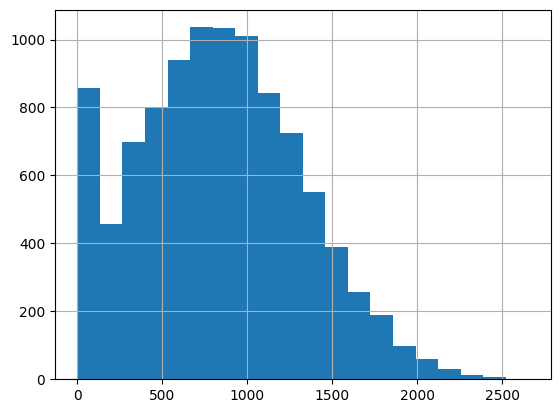

In [102]:
# xem phan bo du lieu
df_default['balance'].hist(bins=20)
plt.show()

In [103]:
# combo 
df_default.shape
df_default.info()
df_default.describe()
df_default.isnull().sum()
df_default.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### 4.1.2. Linear regression with this default data

In [104]:
df_default.head(2)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700


Now we going to build linear model to predict whether a person will default or not based on these information.
we then can see the inefficient of linear model in this case.

In [106]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [131]:
df=df_default.copy()
# encode the categorical variables
le_default = LabelEncoder()
le_student = LabelEncoder()

df['default'] = le_default.fit_transform(df['default'])   # yes = 1, no = 0
df['student'] = le_default.fit_transform(df['student'])   # yes = 1, no = 0

In [118]:
# Feature and target
X = df[['student','balance','income']]
y = df['default']

In [119]:
# Train test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)  # 80% data fro training, 20% for testing

In [120]:
# Fit linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [122]:
# Prediction 
y_pred = lin_reg.predict(X_test)

In [123]:
# Evaluation 
print("MSE:", mean_squared_error(y_test, y_pred))
print("R:", r2_score(y_test, y_pred))


MSE: 0.029563852454534904
R: 0.11245648933015384


In [129]:
# probability threshold for classification
y_class_pred = np.where(y_pred > 0.5, 1, 0)
print("Predicted classes:", y_class_pred[:10])

# Compare with actual values
print("Actual:", y_test.values[:10])

Predicted classes: [0 0 0 0 0 0 0 0 0 0]
Actual: [0 0 0 0 0 0 1 0 0 1]


In [151]:
# test with real data
new_data = pd.DataFrame({
    'student': [1],  # Encode Yes/No to number and covered it in [] to create data frame
    'balance': [1500],
    'income': [20000]
})

# Predict (linear regression output is continuous)
pred_value = lin_reg.predict(new_data)
print("Raw prediction (0 to ~1):", pred_value)

# Convert to class (Yes=1, No=0) using threshold 0.5
pred_class = 1 if (pred_value > 0.5) else 0
pred_label = le_default.inverse_transform([pred_class])
print("Predicted Default:", pred_label)

# neu khong muon co [] ở kết quả thì có thể them [0] hoac .item() vi ket qua trong scikit-learn luon gia dinh rang
# ban co the truyen vao nhieu mau (rows) cung luc vi vay scikit-learn luon tra ve mang de ko phai viet code re nhanh
# cho tung trường hợp ( 1 mẫu duy nhất và nhiều mẫu)

Raw prediction (0 to ~1): [0.11414945]
Predicted Default: ['No']
